In [ ]:
import pandas as pd
import numpy as np

In [2]:

import pandas as pd
import jieba
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

In [3]:

df = pd.read_excel("D:\\HuaweiMoveData\\Users\\scenery alone good\\Desktop\\万方汇总.xlsx", sheet_name='Sheet1') #文件路径
text_data = df['标题_关键词'].astype(str).tolist()                                                 #该列的字段名


In [4]:
stopwords_path =r"D:\HuaweiMoveData\Users\scenery alone good\Desktop\stopwords.txt"  # 停用词文件路径
with open(stopwords_path,'r', encoding='utf-8') as f:
    stopwords = set([line.strip() for line in f])

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\SCENER~1\AppData\Local\Temp\jieba.cache
Loading model cost 0.737 seconds.
Prefix dict has been built successfully.


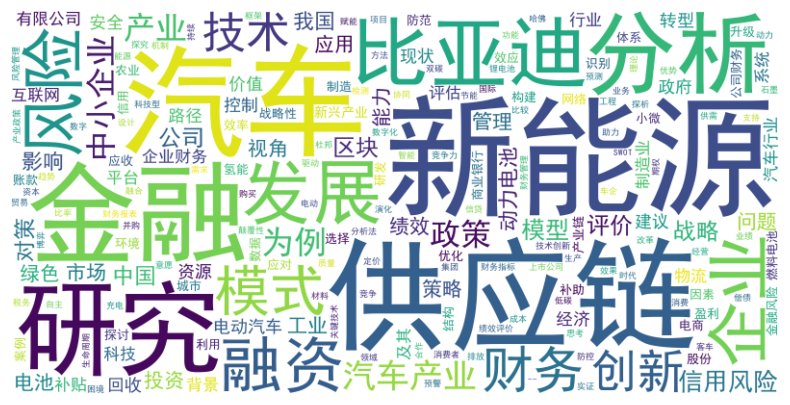

In [5]:
all_words = []
for text in text_data:
    words = jieba.cut(text)
    filtered_words = [word for word in words if word not in stopwords and len(word) > 1]
    all_words.extend(filtered_words)


# In[49]:


word_counts = Counter(all_words)                                                      #计算词的频次
word_counts_num = pd.DataFrame(list(word_counts.items()), columns=['Word', 'Count'])  #转成数据框，可导出成excel文件


# In[50]:


weights = {word: count*1 for word, count in word_counts.items()}
wordcloud = WordCloud(random_state=16,font_path='C:\\Windows\\Fonts\\simhei.ttf',width=800, height=400, background_color='white').generate_from_frequencies(weights)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('D:\\HuaweiMoveData\\Users\\scenery alone good\\Desktop\\ciyun.png')
plt.show()

